In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import lightgbm as lgb
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
df = pd.read_csv("Nifty50/BAJAJFINSV.csv")
df.set_index("Date", drop=False, inplace=True)
df.head(5)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,,
2008-05-26,2008-05-26,BAJAJFINSV,EQ,2101.05,600.00,619.00,501.0,505.1,509.10,548.85,3145446,1.726368e+14,NaN,908264,0.2888
2008-05-27,2008-05-27,BAJAJFINSV,EQ,509.10,505.00,610.95,491.1,564.0,554.65,572.15,4349144,2.488370e+14,NaN,677627,0.1558
2008-05-28,2008-05-28,BAJAJFINSV,EQ,554.65,564.00,665.60,564.0,643.0,640.95,618.37,4588759,2.837530e+14,NaN,774895,0.1689
2008-05-29,2008-05-29,BAJAJFINSV,EQ,640.95,656.65,703.00,608.0,634.5,632.40,659.60,4522302,2.982921e+14,NaN,1006161,0.2225
2008-05-30,2008-05-30,BAJAJFINSV,EQ,632.40,642.40,668.00,588.3,647.0,644.00,636.41,3057669,1.945929e+14,NaN,462832,0.1514


In [13]:
df.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,...,Turnover_mean_lag30,Turnover_std_lag3,Turnover_std_lag7,Turnover_std_lag30,Trades_mean_lag3,Trades_mean_lag7,Trades_mean_lag30,Trades_std_lag3,Trades_std_lag7,Trades_std_lag30
count,3201.000000,3201.000000,3201.000000,3201.000000,3201.000000,3201.000000,3201.000000,3.201000e+03,3.201000e+03,3201.000000,...,3.201000e+03,3.201000e+03,3.201000e+03,3.201000e+03,3201.000000,3201.000000,3201.000000,3201.000000,3201.000000,3201.000000
mean,2755.864386,2760.382381,2803.614449,2716.731443,2758.781537,2758.657451,2761.156954,2.315312e+05,9.533424e+13,20892.811075,...,9.306703e+13,3.202323e+13,4.039684e+13,5.419115e+13,20805.794922,20746.582031,20480.119141,6680.793945,8337.476562,10924.103516
std,2869.811765,2874.814173,2912.885262,2834.037357,2873.792614,2873.522615,2874.033545,4.402681e+05,2.176448e+14,28375.674836,...,1.780327e+14,7.833223e+13,9.026295e+13,1.052511e+14,26699.589844,25510.861328,23636.056641,9701.224609,10747.475586,11968.115234
min,90.750000,88.150000,93.100000,88.150000,91.000000,90.750000,89.260000,4.570000e+02,1.376712e+10,149.000000,...,4.184822e+11,1.353934e+10,4.972613e+10,4.184708e+11,733.000000,837.142883,1283.699951,19.035055,134.863770,535.050903
25%,527.900000,528.600000,542.600000,520.000000,527.950000,527.900000,531.270000,3.981100e+04,2.751053e+12,3892.000000,...,4.882890e+12,1.392501e+12,2.550971e+12,4.904577e+12,4226.333496,4415.428711,4663.733398,1511.740112,2313.198730,3437.672363
50%,1098.700000,1095.000000,1118.000000,1080.250000,1100.000000,1098.700000,1103.560000,9.995300e+04,1.090486e+13,17048.000000,...,1.333914e+13,6.065249e+12,1.063888e+13,1.551185e+13,17890.000000,17930.857422,18797.433594,4880.692871,6623.359863,8869.031250
75%,5121.900000,5120.000000,5199.800000,5042.800000,5115.000000,5125.100000,5127.510000,2.315400e+05,8.755946e+13,20892.811075,...,9.426593e+13,2.506287e+13,3.496091e+13,5.487700e+13,20805.792969,20746.582031,20480.119141,6680.793945,8337.476562,10924.103516
max,11176.550000,11000.000000,11300.000000,10868.700000,11175.450000,11176.550000,11081.780000,6.271671e+06,3.394379e+15,312959.000000,...,1.110284e+15,1.166731e+15,1.253274e+15,8.651080e+14,294203.343750,200212.718750,151305.406250,104646.140625,115968.476562,78011.593750


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3201 entries, 2008-05-26 to 2021-04-30
Data columns (total 45 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 3201 non-null   object 
 1   Symbol               3201 non-null   object 
 2   Series               3201 non-null   object 
 3   Prev Close           3201 non-null   float64
 4   Open                 3201 non-null   float64
 5   High                 3201 non-null   float64
 6   Low                  3201 non-null   float64
 7   Last                 3201 non-null   float64
 8   Close                3201 non-null   float64
 9   VWAP                 3201 non-null   float64
 10  Volume               3201 non-null   int64  
 11  Turnover             3201 non-null   float64
 12  Trades               3201 non-null   float64
 13  Deliverable Volume   3201 non-null   int64  
 14  %Deliverble          3201 non-null   float64
 15  High_mean_lag3       3201 no

<AxesSubplot:xlabel='Date'>

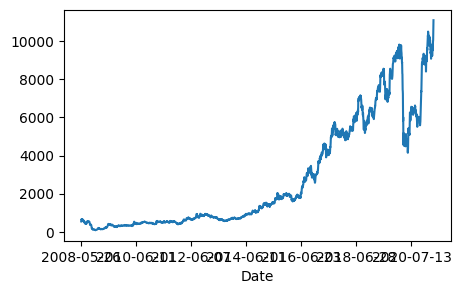

In [11]:
df.VWAP.plot(figsize=(5,3))

In [12]:
df.reset_index(drop=True, inplace=True)
lag_features = ["High", "Low", "Volume", "Turnover", "Trades"]
window1 = 3
window2 = 7
window3 = 30

df_rolled_3d = df[lag_features].rolling(window=window1, min_periods=0)
df_rolled_7d = df[lag_features].rolling(window=window2, min_periods=0)
df_rolled_30d = df[lag_features].rolling(window=window3, min_periods=0)

df_mean_3d = df_rolled_3d.mean().shift(1).reset_index().astype(np.float32)
df_mean_7d = df_rolled_7d.mean().shift(1).reset_index().astype(np.float32)
df_mean_30d = df_rolled_30d.mean().shift(1).reset_index().astype(np.float32)

df_std_3d = df_rolled_3d.std().shift(1).reset_index().astype(np.float32)
df_std_7d = df_rolled_7d.std().shift(1).reset_index().astype(np.float32)
df_std_30d = df_rolled_30d.std().shift(1).reset_index().astype(np.float32)


for feature in lag_features:
    df[f"{feature}_mean_lag{window1}"] = df_mean_3d[feature]
    df[f"{feature}_mean_lag{window2}"] = df_mean_7d[feature]
    df[f"{feature}_mean_lag{window3}"] = df_mean_30d[feature]
    
    df[f"{feature}_std_lag{window1}"] = df_std_3d[feature]
    df[f"{feature}_std_lag{window2}"] = df_std_7d[feature]
    df[f"{feature}_std_lag{window3}"] = df_std_30d[feature]

df.fillna(df.mean(), inplace=True)

df.set_index("Date", drop=False, inplace=True)
df.head()

C:\Users\ridhi\AppData\Local\Temp\ipykernel_15036\221719759.py:29: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,Turnover_mean_lag30,Turnover_std_lag3,Turnover_std_lag7,Turnover_std_lag30,Trades_mean_lag3,Trades_mean_lag7,Trades_mean_lag30,Trades_std_lag3,Trades_std_lag7,Trades_std_lag30
Date,,,,,,,,,,,,,,,,,,,,,
2008-05-26,2008-05-26,BAJAJFINSV,EQ,2101.05,600.00,619.00,501.0,505.1,509.10,548.85,...,9.306703e+13,3.202323e+13,4.039685e+13,5.419115e+13,20805.792969,20746.582031,20480.119141,6680.793945,8337.476562,10924.103516
2008-05-27,2008-05-27,BAJAJFINSV,EQ,509.10,505.00,610.95,491.1,564.0,554.65,572.15,...,1.726368e+14,3.202323e+13,4.039685e+13,5.419115e+13,20805.792969,20746.582031,20480.119141,6680.793945,8337.476562,10924.103516
2008-05-28,2008-05-28,BAJAJFINSV,EQ,554.65,564.00,665.60,564.0,643.0,640.95,618.37,...,2.107369e+14,5.388164e+13,5.388164e+13,5.388164e+13,20805.792969,20746.582031,20480.119141,6680.793945,8337.476562,10924.103516
2008-05-29,2008-05-29,BAJAJFINSV,EQ,640.95,656.65,703.00,608.0,634.5,632.40,659.60,...,2.350756e+14,5.682195e+13,5.682195e+13,5.682195e+13,20805.792969,20746.582031,20480.119141,6680.793945,8337.476562,10924.103516
2008-05-30,2008-05-30,BAJAJFINSV,EQ,632.40,642.40,668.00,588.3,647.0,644.00,636.41,...,2.508797e+14,2.541759e+13,5.613884e+13,5.613884e+13,20805.792969,20746.582031,20480.119141,6680.793945,8337.476562,10924.103516


In [15]:
df.Date = pd.to_datetime(df.Date, format="%Y-%m-%d")
df["month"] = df.Date.dt.month
df["week"] = df.Date.dt.week
df["day"] = df.Date.dt.day
df["day_of_week"] = df.Date.dt.dayofweek
df.head()

C:\Users\ridhi\AppData\Local\Temp\ipykernel_15036\2560288566.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df["week"] = df.Date.dt.week


,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,Trades_mean_lag3,Trades_mean_lag7,Trades_mean_lag30,Trades_std_lag3,Trades_std_lag7,Trades_std_lag30,month,week,day,day_of_week
Date,,,,,,,,,,,,,,,,,,,,,
2008-05-26,2008-05-26,BAJAJFINSV,EQ,2101.05,600.00,619.00,501.0,505.1,509.10,548.85,...,20805.792969,20746.582031,20480.119141,6680.793945,8337.476562,10924.103516,5,22,26,0
2008-05-27,2008-05-27,BAJAJFINSV,EQ,509.10,505.00,610.95,491.1,564.0,554.65,572.15,...,20805.792969,20746.582031,20480.119141,6680.793945,8337.476562,10924.103516,5,22,27,1
2008-05-28,2008-05-28,BAJAJFINSV,EQ,554.65,564.00,665.60,564.0,643.0,640.95,618.37,...,20805.792969,20746.582031,20480.119141,6680.793945,8337.476562,10924.103516,5,22,28,2
2008-05-29,2008-05-29,BAJAJFINSV,EQ,640.95,656.65,703.00,608.0,634.5,632.40,659.60,...,20805.792969,20746.582031,20480.119141,6680.793945,8337.476562,10924.103516,5,22,29,3
2008-05-30,2008-05-30,BAJAJFINSV,EQ,632.40,642.40,668.00,588.3,647.0,644.00,636.41,...,20805.792969,20746.582031,20480.119141,6680.793945,8337.476562,10924.103516,5,22,30,4


In [16]:
df.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'High_mean_lag3', 'High_mean_lag7', 'High_mean_lag30',
       'High_std_lag3', 'High_std_lag7', 'High_std_lag30', 'Low_mean_lag3',
       'Low_mean_lag7', 'Low_mean_lag30', 'Low_std_lag3', 'Low_std_lag7',
       'Low_std_lag30', 'Volume_mean_lag3', 'Volume_mean_lag7',
       'Volume_mean_lag30', 'Volume_std_lag3', 'Volume_std_lag7',
       'Volume_std_lag30', 'Turnover_mean_lag3', 'Turnover_mean_lag7',
       'Turnover_mean_lag30', 'Turnover_std_lag3', 'Turnover_std_lag7',
       'Turnover_std_lag30', 'Trades_mean_lag3', 'Trades_mean_lag7',
       'Trades_mean_lag30', 'Trades_std_lag3', 'Trades_std_lag7',
       'Trades_std_lag30', 'month', 'week', 'day', 'day_of_week'],
      dtype='object')

In [17]:
df_train = df[df.Date < "2019"]
df_valid = df[df.Date >= "2019"]

exogenous_features = ["High_mean_lag3", "High_std_lag3", "Low_mean_lag3", "Low_std_lag3",
                      "Volume_mean_lag3", "Volume_std_lag3", "Turnover_mean_lag3",
                      "Turnover_std_lag3", "Trades_mean_lag3", "Trades_std_lag3",
                      "High_mean_lag7", "High_std_lag7", "Low_mean_lag7", "Low_std_lag7",
                      "Volume_mean_lag7", "Volume_std_lag7", "Turnover_mean_lag7",
                      "Turnover_std_lag7", "Trades_mean_lag7", "Trades_std_lag7",
                      "High_mean_lag30", "High_std_lag30", "Low_mean_lag30", "Low_std_lag30",
                      "Volume_mean_lag30", "Volume_std_lag30", "Turnover_mean_lag30",
                      "Turnover_std_lag30", "Trades_mean_lag30", "Trades_std_lag30",
                      "month", "week", "day", "day_of_week"]

In [18]:
model = auto_arima(df_train.VWAP, exogenous=df_train[exogenous_features], trace=True, error_action="ignore", suppress_warnings=True)
model.fit(df_train.VWAP, exogenous=df_train[exogenous_features])

forecast = model.predict(n_periods=len(df_valid), exogenous=df_valid[exogenous_features])
df_valid["Forecast_ARIMAX"] = forecast

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=2.55 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=28269.314, Time=0.05 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=27879.000, Time=0.09 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.31 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=27581.376, Time=0.11 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=27503.456, Time=0.20 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=27415.022, Time=0.20 sec
 ARIMA(5,2,0)(0,0,0)[0]             : AIC=27365.988, Time=0.34 sec
 ARIMA(5,2,1)(0,0,0)[0]             : AIC=inf, Time=4.70 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=inf, Time=3.43 sec
 ARIMA(5,2,0)(0,0,0)[0] intercept   : AIC=27367.989, Time=0.74 sec

Best model:  ARIMA(5,2,0)(0,0,0)[0]          
Total fit time: 12.753 seconds


c:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\ridhi\AppData\Local\Temp\ipykernel_15036\395220638.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid["Forecast_ARIMAX"] = forecast


<AxesSubplot:xlabel='Date'>

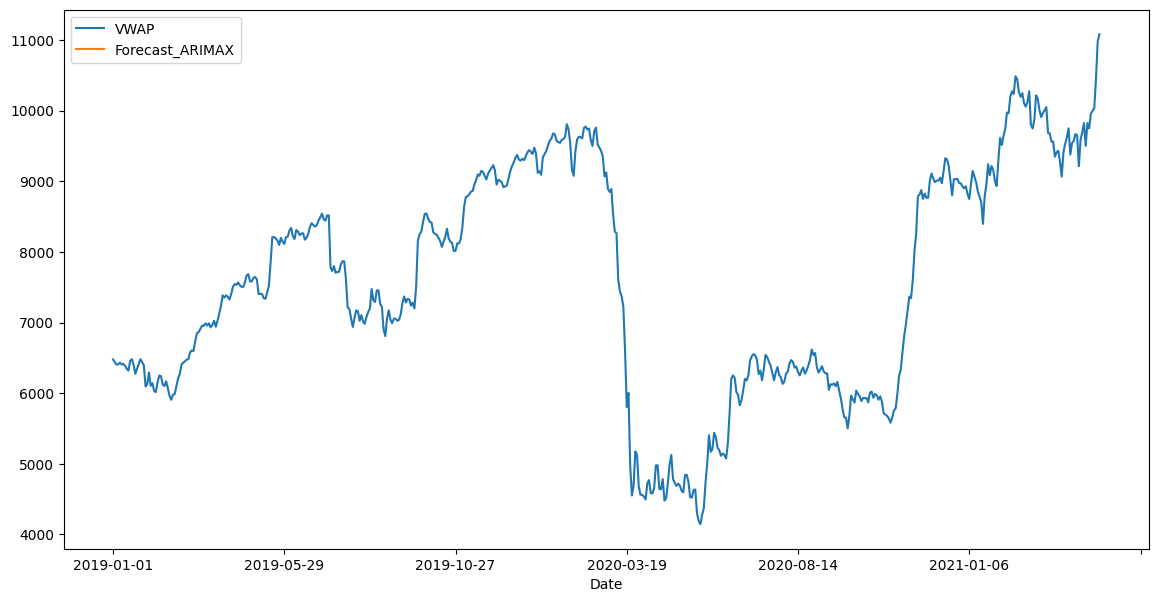

In [19]:
df_valid[["VWAP", "Forecast_ARIMAX"]].plot(figsize=(14, 7))